<a href="https://colab.research.google.com/github/Harbringe/VAP-Data-science/blob/main/intership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Aaditya Mehetre

Div: A

Roll no. 45

# Execise Dataset analysis

The objective of this notebook is to analyze a dataset containing information about the results of fitness exercises performed by individuals and complete the following tasks:
1. Print the total number of entries in the dataset.
2. Plot the distribution of resting heart rates by diet type.
3. Plot the distribution of heart rates before and after exercise by diet type.
4. Calculate the average heart rate by diet type and activity level.
5. Plot the average heart rate by diet type and activity level.
6. Print the names of individuals with the highest and lowest heart rates after exercise.
7. Plot the distribution of heart rates before and after exercise by gender.
8. Calculate the median heart rate for each activity level.
9. Print the names of individuals with the highest and lowest heart rate differences between before and after exercise.
10. Plot the distribution of heart rate differences between before and after exercise by diet type.

The dataset can be found at [GitHub.com/harbringe/DS_intern/exercise.csv](link).

## Importing common libraries:

Let's import libraries that we will be requiring for this project.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset and cleaning:

Let's start by importing the dataset. We will be using the `.read_csv()` from pandas library for this purpose. We will be storing this csv file in a dataframe named `df`.

In [2]:
df = pd.read_csv('exercise.csv', index_col=0)
df.head(10)

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
5,2,low fat,93,30 min,rest
6,3,low fat,97,1 min,rest
7,3,low fat,97,15 min,rest
8,3,low fat,94,30 min,rest
9,4,low fat,80,1 min,rest


In [3]:
df.shape

(90, 5)

In [4]:
df.columns

Index(['id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

We can see that we have 90 rows and 5 columns in our dataset. Feature list includes 'id', 'diet', 'pulse', 'time', 'kind'.

Let's try and see if there are any duplicates in our dataset. Removal of duplicates is crucial since it may introduce unnecessary bias in later stages.

In [5]:
df.duplicated().sum()

0

There are no duplicates in our dataset. Let's use the `describe()` and `info()` functions to understand the dataset better.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      90 non-null     int64 
 1   diet    90 non-null     object
 2   pulse   90 non-null     int64 
 3   time    90 non-null     object
 4   kind    90 non-null     object
dtypes: int64(2), object(3)
memory usage: 4.2+ KB


Observations:
- The time format needs correction to date-time or int format.
- There are no missing values in the dataset, which is positive.

Let's correct the time format.

In [7]:
df['time'] = df['time'].str.replace(' min', '').astype(int)
df.dtypes

id        int64
diet     object
pulse     int64
time      int64
kind     object
dtype: object

Let's now describe our dataset using the `describe()` function.

In [8]:
df.describe()

,id,pulse,time
count,90.000000,90.000000,90.000000
mean,15.500000,99.700000,15.333333
std,8.703932,14.858471,11.907886
min,1.000000,80.000000,1.000000
25%,8.000000,90.250000,1.000000
50%,15.500000,96.000000,15.000000
75%,23.000000,103.000000,30.000000
max,30.000000,150.000000,30.000000


## Tasks:

The dataset looks good now, let's start completing the tasks.

### 1. Print the total number of entries in the dataset.

We can accomplish this using `df.shape`. This method returns a tuple containing the total number of rows and columns in our DataFrame (`df`).

In [9]:
print(f'Total entries in dataset: {df.shape[0]}')

Total entries in dataset: 90


### 2. Plot the distribution of resting heart rates by diet type.

We can use different types of plots to complete this task, consider the following three:

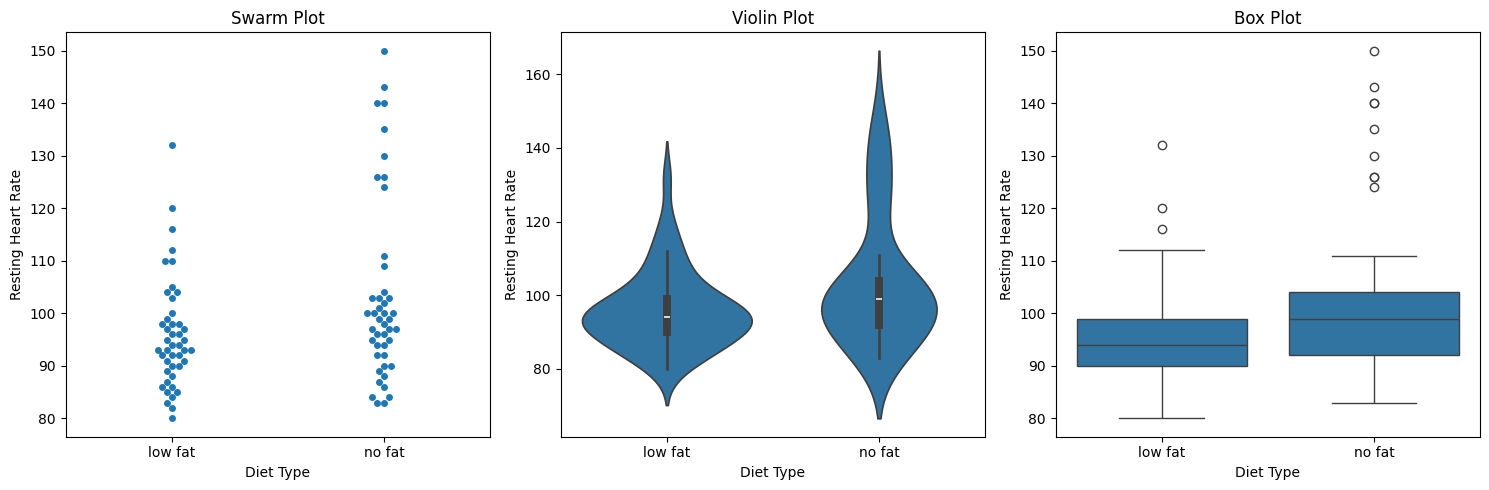

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Swarm plot
sns.swarmplot(x=df['diet'], y=df['pulse'], ax=axes[0])
axes[0].set_xlabel('Diet Type')
axes[0].set_ylabel('Resting Heart Rate')
axes[0].set_title('Swarm Plot')

# Violin plot
sns.violinplot(x=df['diet'], y=df['pulse'], ax=axes[1])
axes[1].set_xlabel('Diet Type')
axes[1].set_ylabel('Resting Heart Rate')
axes[1].set_title('Violin Plot')

# Box plot
sns.boxplot(x=df['diet'], y=df['pulse'], ax=axes[2])
axes[2].set_xlabel('Diet Type')
axes[2].set_ylabel('Resting Heart Rate')
axes[2].set_title('Box Plot')

plt.tight_layout()
plt.show()


We observe that individuals with a low-fat diet typically have a resting heart rate between 90 and 100 bpm, whereas those on a no-fat diet tend to have a resting heart rate ranging from 90 to 110 bpm. However, it's notable that many individuals on a no-fat diet may also exhibit higher heart rates, ranging from 120 to 140 bpm.

### 3. Plot the distribution of heart rates before and after exercise by diet type.

Once more, we can utilize various types of graphs to depict distributions. For this analysis, we will exclusively employ violin and box plots. To distinguish between heart rates before and after exercise, we can set `hue = df['kind']` for this purpose.

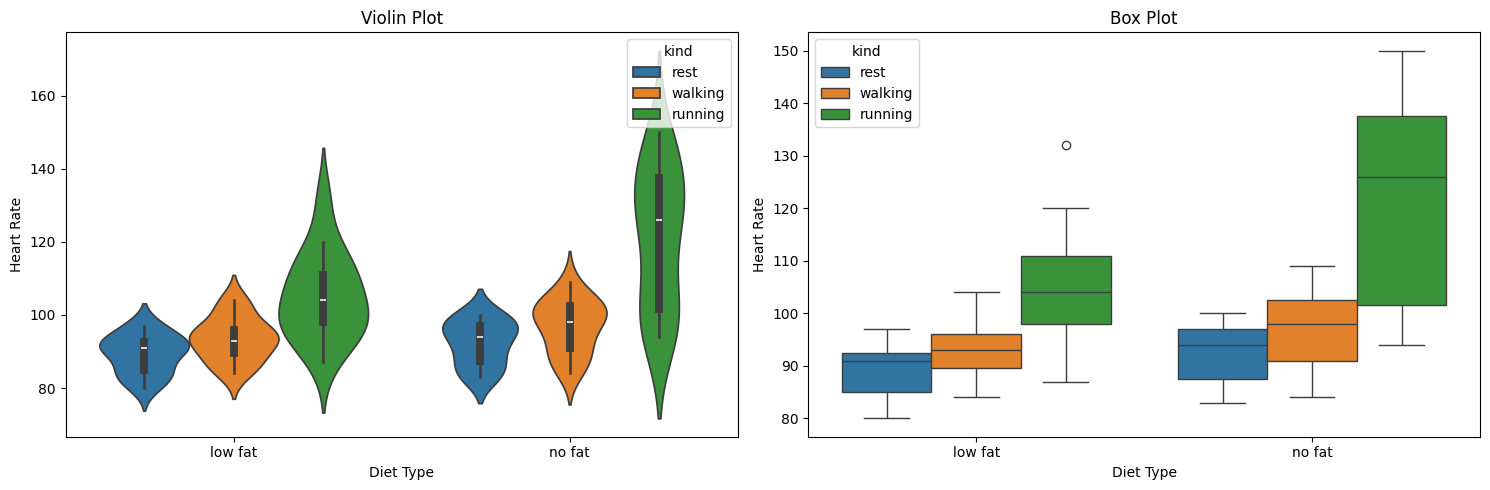

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Violin plot
sns.violinplot(x=df['diet'], y=df['pulse'], hue=df['kind'], ax=axes[0])
axes[0].set_xlabel('Diet Type')
axes[0].set_ylabel('Heart Rate')
axes[0].set_title('Violin Plot')

# Box plot
sns.boxplot(x=df['diet'], y=df['pulse'], hue=df['kind'], ax=axes[1])
axes[1].set_xlabel('Diet Type')
axes[1].set_ylabel('Heart Rate')
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.show()

Individuals on a low-fat diet tend to exhibit lower heart rates both before and after exercise compared to those on a no-fat diet. After exercise, heart rates generally increase for both diet types. However, there is greater variability in heart rates after exercise, particularly among individuals on a no-fat diet.

### 4. Calculate the average heart rate by diet type and activity level.

This can be done using the `.groupby()` function of pandas. We will groupby diet type and activity level and then calculate the mean heart rate for each group.

In [ ]:
avg_heart_rate = df.groupby(['diet', 'kind'])['pulse'].mean().unstack()
avg_heart_rate

kind,rest,running,walking
diet,,,
low fat,89.333333,105.066667,93.466667
no fat,92.333333,121.066667,96.933333


### 5. Plot the average heart rate by diet type and activity level.

This can be done by simply plotting the `avg_hear_rate` variable that we derived in the previous task.

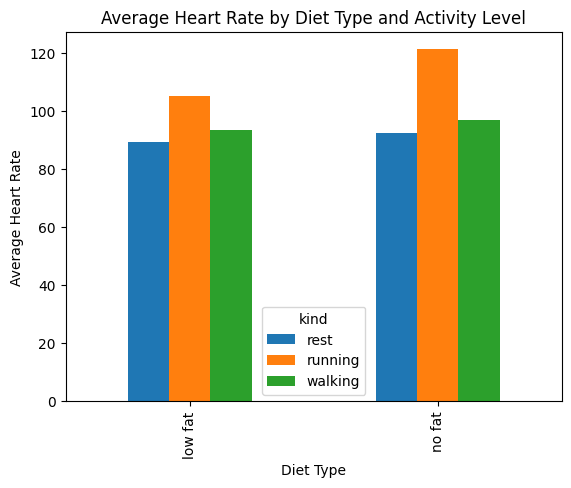

In [ ]:
avg_heart_rate.plot(kind='bar')
plt.xlabel('Diet Type')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate by Diet Type and Activity Level')
plt.show()


We can see that there is an overall increase in the average heart rate for individuals on a no fat diet. This increase is very significant in case of running exercises.

### 6. Print the names of individuals with the highest and lowest heart rates after exercise.

 This can be achieved by first identifying the highest or lowest heart rate in the dataset and then searching for IDs (Since there are no names provided in the dataset, we will print the IDs of individuals with the highest and lowest heart rates) that correspond to these heart rates.

In [ ]:
# Highest heart rate after exercise
highest_hr = df[df['kind'] == 'running']['pulse'].max()
highest_hr_ids = df[df['pulse'] == highest_hr]['id'].tolist()
print(f'Individuals with the highest heart rate after exercise: {highest_hr_ids} \nHeart rate: {highest_hr} BPM')

# Lowest heart rate after exercise
lowest_hr = df[df['kind'] == 'running']['pulse'].min()
lowest_hr_ids = df[df['pulse'] == lowest_hr]['id'].tolist()
print(f'Individuals with the lowest heart rate after exercise: {lowest_hr_ids} \nHeart rate: {lowest_hr} BPM')


Individuals with the highest heart rate after exercise: [30] 
Heart rate: 150 BPM
Individuals with the lowest heart rate after exercise: [7, 24] 
Heart rate: 87 BPM


### 7. Plot the distribution of heart rates before and after exercise by gender.

There is no feature representing gender in our dataset. The data provided is insufficient for completion of this task.

### 8. Calculate the median heart rate for each activity level.

We can group the data by the activity level and then calculate the median heart rate for each group.

In [ ]:
median_heart_rate = df.groupby('kind')['pulse'].median()
median_heart_rate

kind
rest        91.5
running    110.0
walking     95.5
Name: pulse, dtype: float64

### 9. Print the names of individuals with the highest and lowest heart rate differences between before and after exercise.

We have once again not been provided with the names of individuals in the dataset; therefore, we will be returning the individual IDs instead. For this task, we can start by calculating the difference between heart rates before and after exercise across all activity levels. This can be achieved by grouping the data by `id` and then applying a lambda function: `x: x.diff().abs().sum()`. This will calculate the difference between heart rates. From this data, we can then find the maximum and minimum differences and use them to find the individual IDs.


In [ ]:
# Calculate the difference in heart rate
df['heart_rate_diff'] = df.groupby('id')['pulse'].transform(lambda x: x.diff().abs().sum())

# Find the highest
highest_diff = df['heart_rate_diff'].max()
highest_diff_ids = df[df['heart_rate_diff'] == highest_diff]['id'].tolist()

# Find the lowest
lowest_diff = df['heart_rate_diff'].min()
lowest_diff_ids = df[df['heart_rate_diff'] == lowest_diff]['id'].tolist()

print(f'Individual(s) with the highest heart rate difference: {highest_diff_ids}')
print(f'Heart rate difference: {highest_diff}')
print(f'Individual(s) with the lowest heart rate difference: {lowest_diff_ids}')
print(f'Heart rate difference: {lowest_diff}')


Individual(s) with the highest heart rate difference: [24, 24, 24]
Heart rate difference: 57.0
Individual(s) with the lowest heart rate difference: [6, 6, 6]
Heart rate difference: 1.0


### 10. Plot the distribution of heart rate differences between before and after exercise by diet type.

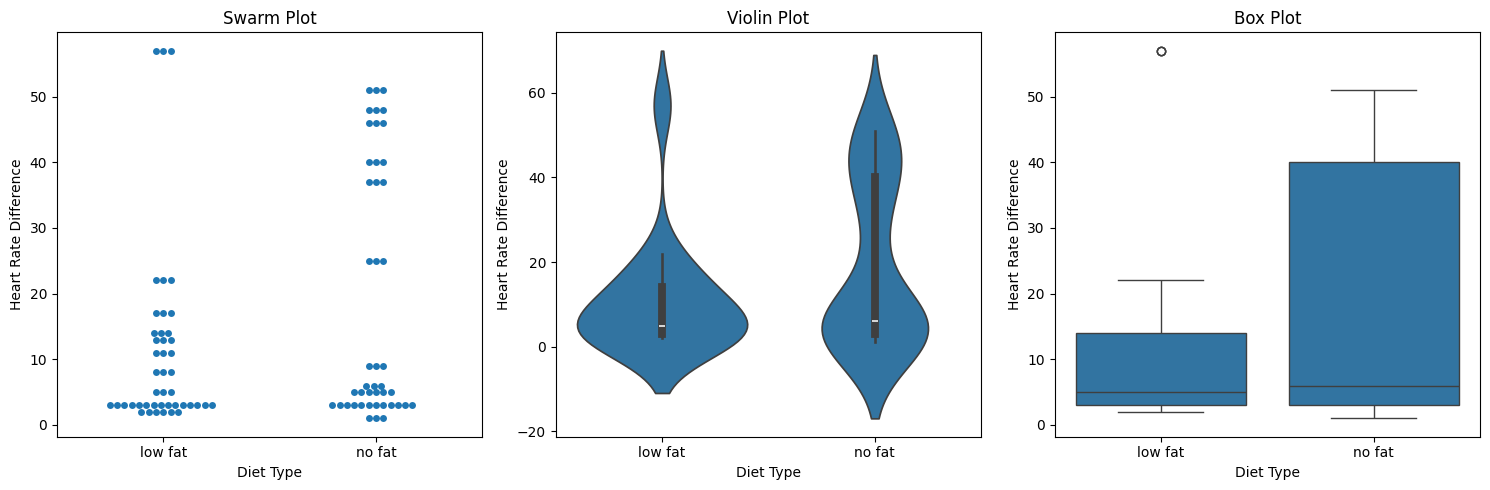

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Swarm plot
sns.swarmplot(x=df['diet'], y=df['heart_rate_diff'], ax=axes[0])
axes[0].set_xlabel('Diet Type')
axes[0].set_ylabel('Heart Rate Difference')
axes[0].set_title('Swarm Plot')

# Violin plot
sns.violinplot(x=df['diet'], y=df['heart_rate_diff'], ax=axes[1])
axes[1].set_xlabel('Diet Type')
axes[1].set_ylabel('Heart Rate Difference')
axes[1].set_title('Violin Plot')

# Box plot
sns.boxplot(x=df['diet'], y=df['heart_rate_diff'], ax=axes[2])
axes[2].set_xlabel('Diet Type')
axes[2].set_ylabel('Heart Rate Difference')
axes[2].set_title('Box Plot')

plt.tight_layout()
plt.show()